# STAGE 1 - EDA | Banking Dataset #Absolute

Kelompok 7: 

1. Fikrie Lazuardi 
2. Rian Dwi Haryono
3. Retno dwi
4. Wahyuni
5. Hidayat Yatul
6. Yunita Rachmawati
7. Retno Harindhi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches   
import seaborn as sns
import scipy.stats as st
import matplotlib.ticker as mtick
from matplotlib import transforms
from matplotlib.patches import FancyArrow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv', sep=';')
df_train.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7036,22,student,single,secondary,no,489,no,no,unknown,28,may,223,5,-1,0,unknown,no
36109,30,student,single,secondary,no,948,yes,no,cellular,11,may,150,1,370,2,failure,no
33116,42,blue-collar,married,secondary,no,165,no,no,telephone,20,apr,169,1,-1,0,unknown,no
15791,25,admin.,single,secondary,no,105,no,yes,cellular,21,jul,392,1,-1,0,unknown,no
22698,32,technician,married,secondary,no,79,yes,no,cellular,25,aug,417,4,-1,0,unknown,no


# **Exploratory Data Analysis (Statistic Descriptive)**



### Info Dataset

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Tipe data yang dimiliki pada dataset tersebut sudah sesuai

### Handling Missing Values

In [ ]:
df_train.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Tidak ada kolom yang memiliki nilai/value kosong

### Summary

In [ ]:
df_train['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
df_train_max = df_train['balance'].max()
 
print(df_train_max )

102127


In [ ]:
df_train_min = df_train['balance'].min()
 
print(df_train_min)

-8019


In [ ]:
df_yes = df_train[df_train['y']=='yes']
df_no = df_train[df_train['y']=='no']

In [ ]:
nums=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
cate=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

In [ ]:
df_train[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [ ]:
df_train[nums].mode()

,age,balance,day,duration,campaign,pdays,previous
0,32,0,20,124,1,-1,0


In [ ]:
df_train[cate].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


### Value Kolom Numerikal

In [ ]:
for col in nums:
    print(f'''Data Value count kolom {col}: ''')
    print(df_train[col].value_counts())
    print()

Data Value count kolom age: 
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

Data Value count kolom balance: 
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64

Data Value count kolom day: 
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

Data Value count kolom duration: 
124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: durat

### Value Kolom Kategorikal

In [ ]:
for col in cate:
    print(f'''Data Value count kolom {col}: ''')
    print(df_train[col].value_counts())
    print()

Data Value count kolom job: 
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Data Value count kolom marital: 
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Data Value count kolom education: 
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Data Value count kolom default: 
no     44396
yes      815
Name: default, dtype: int64

Data Value count kolom housing: 
yes    25130
no     20081
Name: housing, dtype: int64

Data Value count kolom loan: 
no     37967
yes     7244
Name: loan, dtype: int64

Data Value count kolom contact: 
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Data Value count kolom month: 
may    13766
jul

Simpulan Kolom Numerikal :
1. Usia nasabah yang paling banyak adalah usia 32 tahun  
2. Terdapat nilai minus di kolom Balance
3. Duration paling banyak adalah 124 detik
4. Jumlah Campaign terbanyak dilakukan 1 kali
5. Nilai Pdays paling banyak adalah nilai -1 (belum pernah dihubungi)

Simpulan Kolom Kategorikal :
1. Pekerjaan paling banyak adalah Blue-collar 
2. Status Nasabah terbanyak yaitu Menikah
3. Jenjang pendidikan paling banyak adalah Secondary
4. Banyaknya nasabah yang tidak default (gagal bayar)
5. Banyaknya nasabah yang sudah memiliki rumah (tidak menyewa rumah)
6. Nasabah paling banyak dihubungi melalui cellular
7. Bulan terakhir menghubungi nasabah yaitu bulan Mei
8. Terdapat paling tinggi value Unknown dikolom Poutcome
9. Ditemukan banyaknya nasabah yang tidak berlangganan di kolom Y

# **Univariate Analysis**

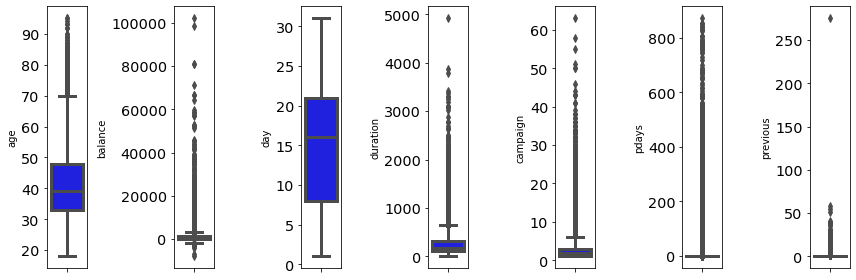

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums),i+1)
    sns.boxplot(y=df_train[nums[i]], color='blue', orient='v')
    plt.tight_layout();

Simpulan Univariate Analisis :

1. Berdasarkan data numerikal hampir seluruhnya memiliki banyak outlier (hanya kolom age yg memiliki sedikit oulier)
2. Pada kolom "balance", "duration", dan "campaign" didominasi oleh nilai yang kecil. 
3. Pada kolom "day" tidak terdapat outlier
4. Nilai -1 pada kolom "pdays" sangat mendominasi, yaitu berjumlah 36954 dari 45211 baris atau sekitar 81% data sehingga kotak pada gambar diatas terpusat pada nilai -1, maka nilai-nilai diatas -1 menjadi outlier yang cukup banyak yaitu sekitar 19%
5. Nilai 0 yang dimiliki kolom "previous" sangat mendominasi kolom ini dan memiliki korelasi dengan nilai -1 yang berada pada kolom "pdays". Tetapi, ada satu nilai yang sangat jauh yaitu 275 dan outlier ini akan dihapus

### Distribusi Skewness

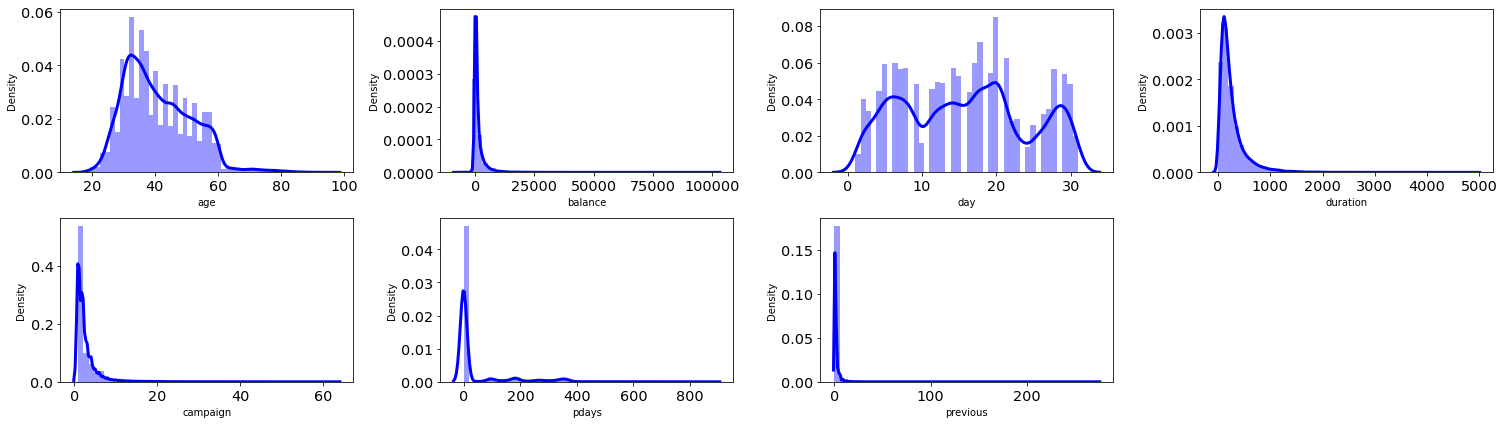

In [ ]:
plt.figure(figsize=(21,6))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.distplot(df_train[nums[i]], color='blue')
    plt.tight_layout()

In [ ]:
for i in range(0, len(nums)):
    print(f"Skewness {df_train[nums].columns[i]} : {df_train[nums[i]].skew()}")

Skewness age : 0.6848179257252598
Skewness balance : 8.360308326166326
Skewness day : 0.09307901402122411
Skewness duration : 3.144318099423456
Skewness campaign : 4.898650166179674
Skewness pdays : 2.6157154736563477
Skewness previous : 41.84645447266292


Simpulan Distribusi Skewness :

Berdasarkan nilai skewness dan visualisasi di atas dapat disimpulkan bahwa tipe data numerikal memiliki pola persebaran data yang ditunjukan dalam bentuk skew positif yang mana nilai mean lebih besar daripada median, tidak seperti data "day" yang hampir menyerupai distribusi normal.

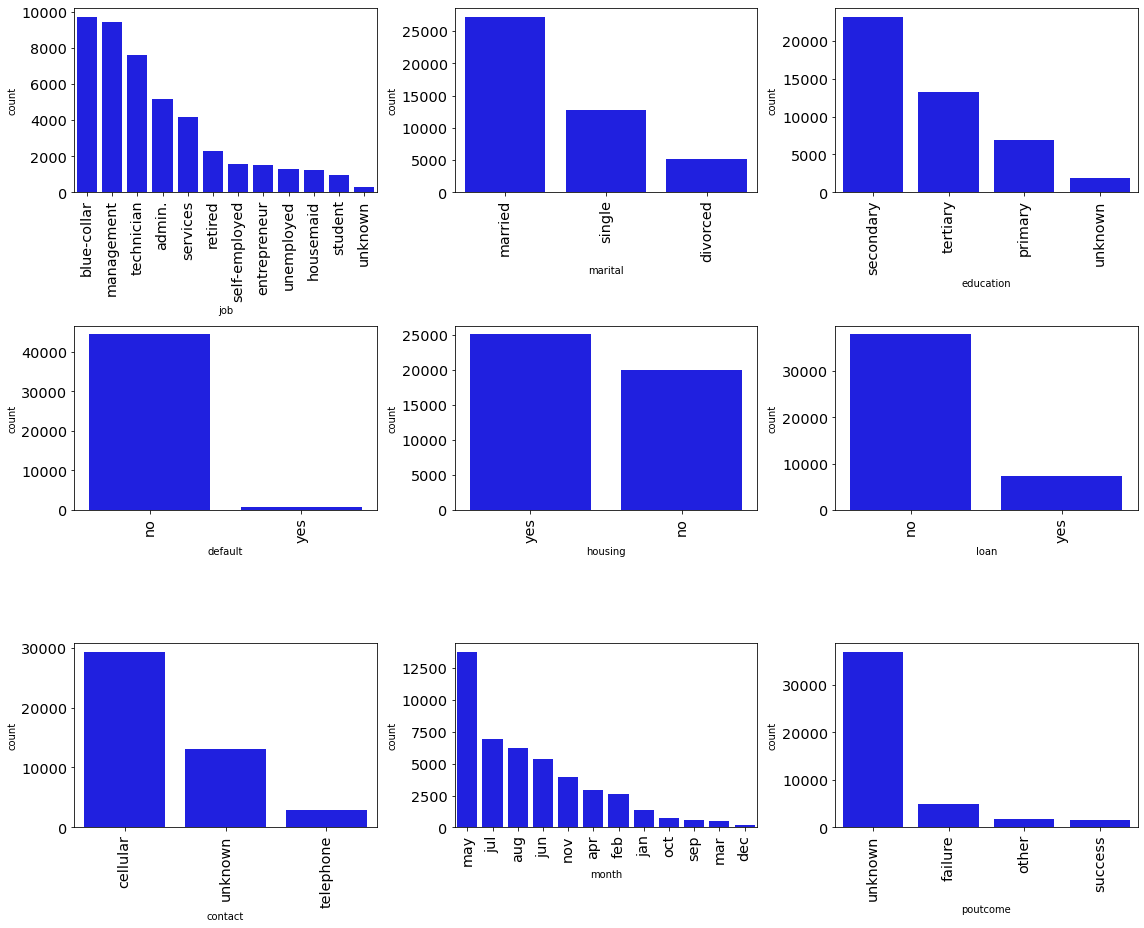

In [ ]:
plt.figure(figsize=(16, 13))
for i in range(0, len(cate)-1):
    df=df_train[cate[i]].value_counts().index
    plt.subplot(3, 3, i+1)
    sns.countplot(df_train[cate[i]], color='blue', orient='h', order=df)
    plt.xticks(rotation=90)
    plt.tight_layout()

# **Multivariate Analysis**

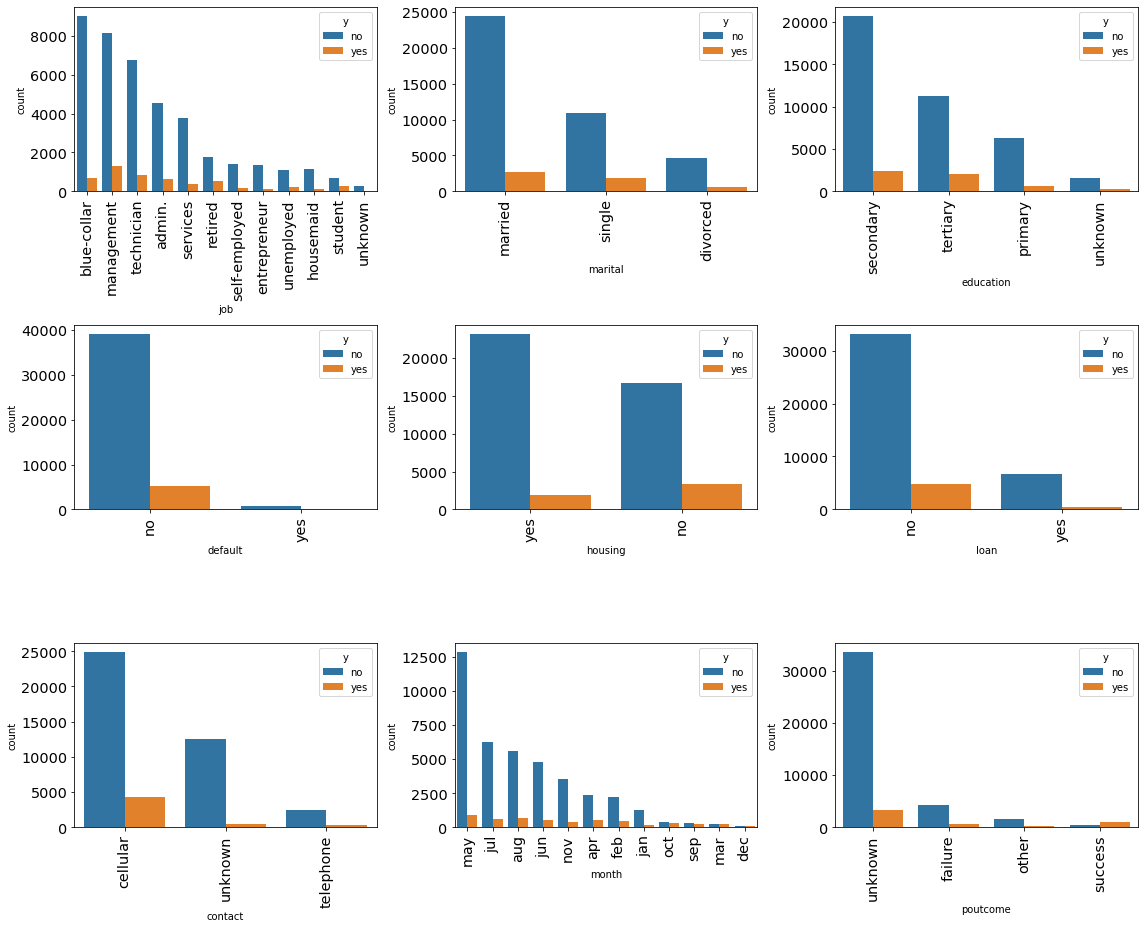

In [ ]:
plt.figure(figsize=(16, 13))
for i in range(0, len(cate)-1):
    df=df_train[cate[i]].value_counts().index
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df_train[cate[i]],hue=df_train['y'], orient='h',order=df)
    plt.xticks(rotation=90)
    plt.tight_layout()

In [ ]:
for col in cate:
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(df_train[col].value_counts(), '\n')

job 
--------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

marital 
--------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

education 
--------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

default 
--------------------
no     44396
yes      815
Name: default, dtype: int64 

housing 
--------------------
yes    25130
no     20081
Name: housing, dtype: int64 

loan 
--------------------
no     37967
yes     7244
Name: loan, dtype: int64 

contact 
--------------------
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

month 
--------------------
may    13766
jul     6895
aug    

In [ ]:
df2 = df_train.groupby(['job', 'y'])['y'].count().reset_index(name='jumlah')
df2

,job,y,jumlah
0,admin.,no,4540
1,admin.,yes,631
2,blue-collar,no,9024
3,blue-collar,yes,708
4,entrepreneur,no,1364
5,entrepreneur,yes,123
6,housemaid,no,1131
7,housemaid,yes,109
8,management,no,8157
9,management,yes,1301


In [ ]:
df3 = df_train.groupby(['marital', 'y'])['y'].count().reset_index(name='jumlah')
df3

,marital,y,jumlah
0,divorced,no,4585
1,divorced,yes,622
2,married,no,24459
3,married,yes,2755
4,single,no,10878
5,single,yes,1912


In [ ]:
df4 = df_train.groupby(['education', 'y'])['y'].count().reset_index(name='jumlah')
df2

,job,y,jumlah
0,admin.,no,4540
1,admin.,yes,631
2,blue-collar,no,9024
3,blue-collar,yes,708
4,entrepreneur,no,1364
5,entrepreneur,yes,123
6,housemaid,no,1131
7,housemaid,yes,109
8,management,no,8157
9,management,yes,1301


In [ ]:
df4 = df_train.groupby(['housing', 'y'])['y'].count().reset_index(name='jumlah')
df4

,housing,y,jumlah
0,no,no,16727
1,no,yes,3354
2,yes,no,23195
3,yes,yes,1935


Simpulan Multivariate Analisis :
1. Nasabah terbanyak berprofesi sebagai Management
2. Status nasabah paling banyak yang berlangganan adalah Menikah
3. Tingkat pendidikan "secondary" merupakan yang paling banyak berlangganan
4. Default "no" lebih banyak dibandingkan "yes"
5. Nasabah yang memiliki rumah lebih banyak berlangganan daripada yang tidak memilikinya
6. Nasabah yang berlangganan terbanyak dengan status tidak memiliki pinjaman 
7. Nasabah yang paling banyak berlangganan dihubungi melalui "cellular" daripada "telephone"
8. Campaign paling banyak yang berlangganan dilakukan pada bulan "may" 
9. Hasil Poutcome nasabah yang berlangganan terbanyak adalah value "unknown"

### Scatter Plot

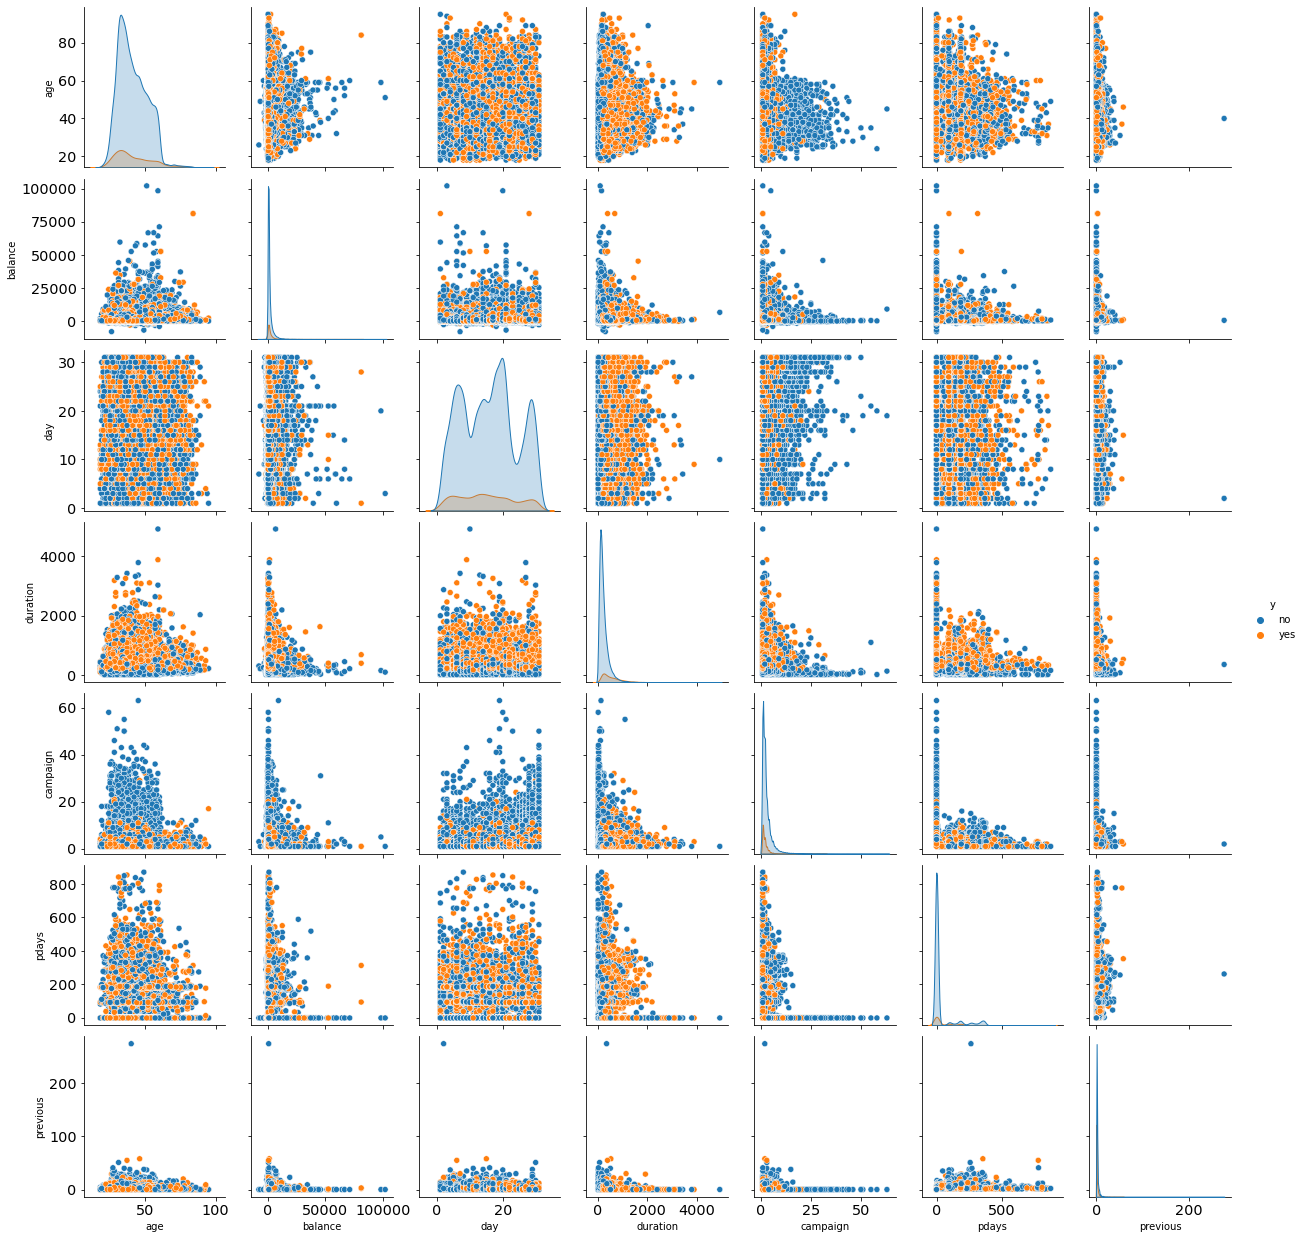

In [ ]:
p=sns.pairplot(df_train,hue='y')

### Heatmap

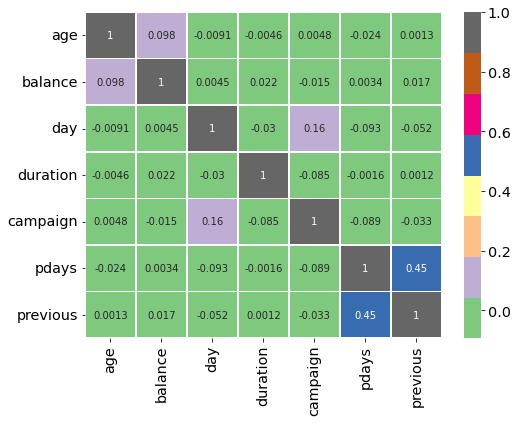

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df_train.corr(),annot=True,cmap='Accent',linewidths=0.5);

Simpulan Heatmap :

Ada dua Korelasi yang cukup kuat
Previous dan pdays dengan nilai 0.45
Campaign dan day dengan nilai 0.16
Sementara feature previous dan pdays tetap dipertahankan untuk dianalisis lebih lanjut

# **Business Insights**

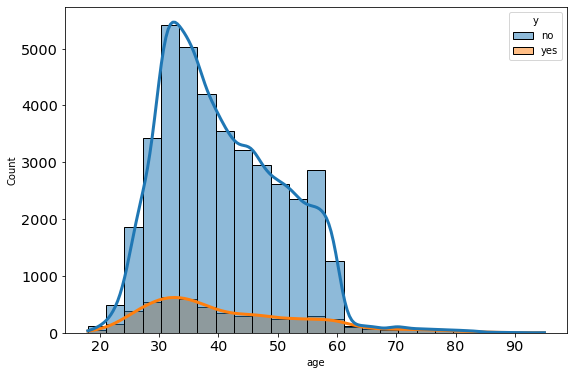

In [ ]:
plt.figure(figsize=(9,6))
sns.histplot(x= 'age',
             data=df_train,
              bins=25,
              hue="y",
              kde=True)

Simpulan :

Age terhadap nasabah yang berlangganan atau tidak berlangganan deposito menunjukkan distribusi yang hampir identik. Hal ini menandakkan variabel tersebut memiliki implikasi yang sama jika disandingkan terhadap y

In [ ]:
df_yes = df_train[df_train['y']=='yes']

In [ ]:
df_yes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,5289.0,41.670070,13.497781,18.0,31.0,38.0,50.0,95.0
balance,5289.0,1804.267915,3501.104777,-3058.0,210.0,733.0,2159.0,81204.0
day,5289.0,15.158253,8.501875,1.0,8.0,15.0,22.0,31.0
duration,5289.0,537.294574,392.525262,8.0,244.0,426.0,725.0,3881.0
campaign,5289.0,2.141047,1.921826,1.0,1.0,2.0,3.0,32.0
pdays,5289.0,68.702968,118.822266,-1.0,-1.0,-1.0,98.0,854.0
previous,5289.0,1.170354,2.553272,0.0,0.0,0.0,1.0,58.0


In [ ]:
df_yes[(df_yes['duration'] >= 120) & (df_yes['duration'] <= 540)].count()

age          3001
job          3001
marital      3001
education    3001
default      3001
balance      3001
housing      3001
loan         3001
contact      3001
day          3001
month        3001
duration     3001
campaign     3001
pdays        3001
previous     3001
poutcome     3001
y            3001
dtype: int64

In [ ]:
df_yes[(df_yes['balance'] >= -100) & (df_yes['balance'] <= 1200)].count()

age          3092
job          3092
marital      3092
education    3092
default      3092
balance      3092
housing      3092
loan         3092
contact      3092
day          3092
month        3092
duration     3092
campaign     3092
pdays        3092
previous     3092
poutcome     3092
y            3092
dtype: int64

In [ ]:
df_yes[(df_yes['age'] >= 25) & (df_yes['age'] <= 60)].count()

age          4580
job          4580
marital      4580
education    4580
default      4580
balance      4580
housing      4580
loan         4580
contact      4580
day          4580
month        4580
duration     4580
campaign     4580
pdays        4580
previous     4580
poutcome     4580
y            4580
dtype: int64

In [ ]:
4580/len(df_yes)

0.8659481943656646

In [ ]:
3001/len(df_yes)

0.5674040461334846

In [ ]:
3215/len(df_yes)

0.6078653809793911

In [ ]:
df_yes = df_train[df_train['y']=='yes']
df_yes = df_yes.copy()

In [ ]:
df_train['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [ ]:
df_train['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

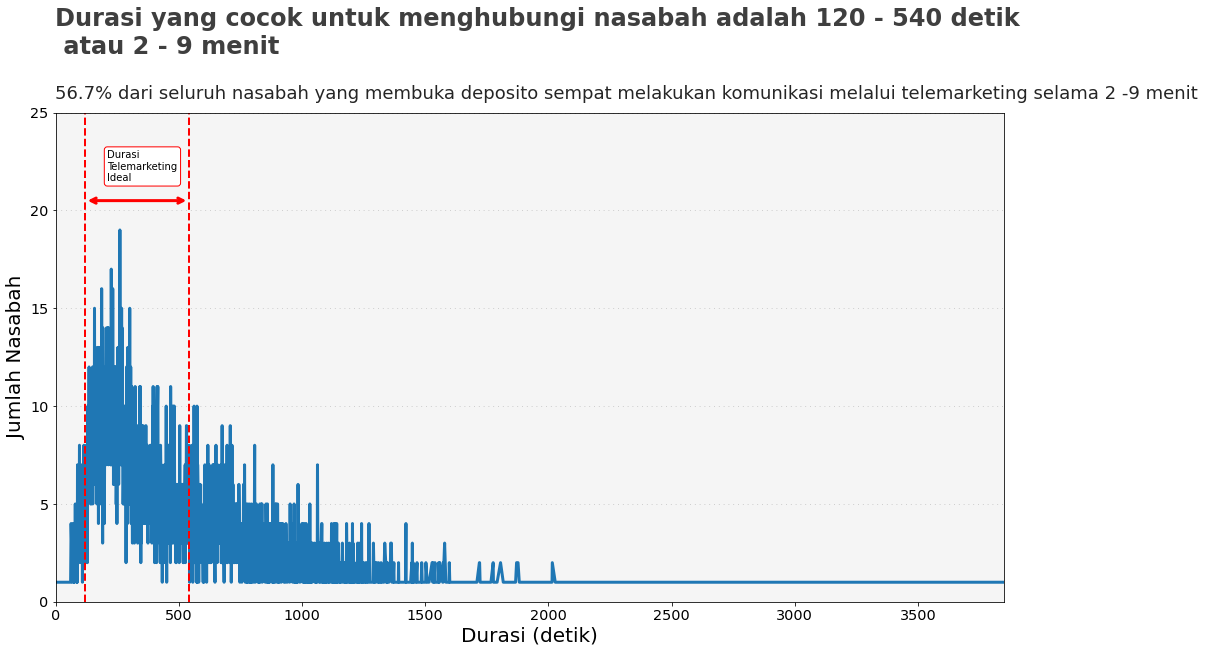

In [ ]:
df_plot = df_yes.groupby('duration').agg({'y':'count'}).reset_index().sort_values('y')

fig, ax1 = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(17)

sns.lineplot(data=df_plot, x='duration', y='y')
plt.ylabel('Jumlah Nasabah', fontsize = 20)
plt.xlabel('Durasi (detik)', fontsize = 20)
plt.axvline(x=120, linewidth=2, color='red', linestyle='--')
plt.axvline(x=540, linewidth=2, color='red', linestyle='--')
plt.xlim(0, 3850)
plt.ylim(0, 25)

ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5)
ax1.set_facecolor('whitesmoke')

plt.text(x = -0.65, y = 28, s = "Durasi yang cocok untuk menghubungi nasabah adalah 120 - 540 detik \n atau 2 - 9 menit",
                                 fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = -0.65, y = 25.7, s = "56.7% dari seluruh nasabah yang membuka deposito sempat melakukan komunikasi melalui telemarketing selama 2 -9 menit",
                                 fontsize = 18, alpha = .85)

plt.annotate ('', xy =(122, 20.5),
              xytext =(539, 20.5),
              arrowprops = dict(arrowstyle='<->', connectionstyle="arc3", color='r', lw=3),
              fontsize=13)

plt.text(x = 210, y = 21.5,
         s = 'Durasi\nTelemarketing\nIdeal', fontsize = 10, bbox = dict(boxstyle = "round", fc="1", color='r'))

plt.show()

Simpulan :

Dapat dilihat grafik diatas bahwa semakin lama durasi komunikasi menandakkan adanya ketertarikan kuat client untuk bergabung menjadi nasabah bank tersebut